# Expected Score Notebook
## Date: January 4, 2021

Purpose of this notebook is to look at the expected score of a turn based on the Score the player is rolling till.

In [1]:
## library imports

import pandas as pd ## data manipulation
import matplotlib.pyplot as plt ## for results plotting
from collections import defaultdict ## for resultstoring
from dice import ScoreBasedPlayer ## dice library


In [2]:
scores_to_check = [50*i for i in range(1,20)] ## scores to loop through
turns  = 10000 ## number of rolls to make 
expected_scores = defaultdict(float) ## for storing results

In [3]:
## loop through each score of interest 

for score in scores_to_check:
    player = ScoreBasedPlayer(score,isin=True) ## create a player who will try and roll till the score of interest
    for _ in range(turns): ## play turns number of turns 
        player.turn() ## play a turn 
    expected_scores[score] = (player.get_stats().TurnScores.mean(),player.get_stats().RollsTaken.mean()) ## calculate expected score 
    
expected_scores

defaultdict(float,
            {50: (87.25, 1.0),
             100: (103.955, 1.2312),
             150: (120.1, 1.5453),
             200: (134.59, 1.7944),
             250: (142.195, 2.0386),
             300: (143.685, 2.2225),
             350: (141.765, 2.3833),
             400: (145.82, 2.568),
             450: (140.055, 2.6633),
             500: (136.915, 2.7876),
             550: (130.695, 2.8769),
             600: (126.68, 2.9533),
             650: (119.485, 2.9987),
             700: (111.7, 3.0843),
             750: (112.14, 3.169),
             800: (99.505, 3.1601),
             850: (101.6, 3.2472),
             900: (90.94, 3.2884),
             950: (88.25, 3.3005)})

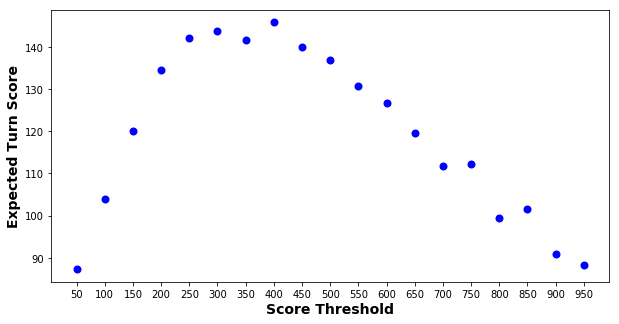

In [4]:
## plot figure 

fig,ax = plt.subplots(1,figsize=(10,5))
ax.scatter(expected_scores.keys(),[value[0] for value in expected_scores.values()],color="blue",linewidth=2)
ax.set_xlabel("Score Threshold",fontweight='bold',fontsize=14)
ax.set_ylabel("Expected Turn Score",fontweight='bold',fontsize=14)
ax.set_xticks(range(50,1000,50))
plt.savefig("TurnExpectedScore.png")
plt.show()